# Find-S

In [31]:
import pandas as pd 
import numpy as np
H=[0,0,0,0,0,0]
df=pd.read_csv("finds.csv", header=None)
print(df)
attribute=np.array(df)[:,:-1]
print(attribute)
target=np.array(df)[:,-1]
print(target)
for i in range(len(df)): 
    for j in range(len(df.columns)-1): 
        if df.iloc[i,-1]=="Yes":
            if H[j]==0:
                H[j]=df.iloc[i,j] 
            elif df.iloc[i,j]!=H[j]: 
                H[j]='?'
print(H)

       0     1       2       3     4       5    6
0  Sunny  Warm  Normal  Strong  Warm    Same  Yes
1  Sunny  Warm    High  Strong  Warm    Same  Yes
2  Rainy  Cold    High  Strong  Warm  Change   No
3  Sunny  Warm    High  Strong  Cool  Change  Yes
[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['Yes' 'Yes' 'No' 'Yes']
['Sunny', 'Warm', '?', 'Strong', '?', '?']


# Candidate Elimination

In [32]:
import pandas as pd
df=pd.read_csv("finds.csv",header=None)
#Intialize S and G
S=[0,0,0,0,0,0]
G=list()
for i in range(len(df.columns)-1):
    G.append(['?','?','?','?','?','?'])
#Read samples
for i in range(len(df)):
    for j in range(len(df.columns)-1):
        if df.iloc[i,-1]=="Yes":
            if S[j]==0:
                S[j]=df.iloc[i,j]
            elif df.iloc[i,j]!=S[j]:
                S[j]="?"
            if G[j][j]!='?' and S[j]=='?':
                G[j][j]='?' 
        else:
            if df.iloc[i,j]!=S[j] and S[j]!='?':
                G[j][j]=S[j]
print(S)
print(G)

['Sunny', 'Warm', '?', 'Strong', '?', '?']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]


# Decision Tree

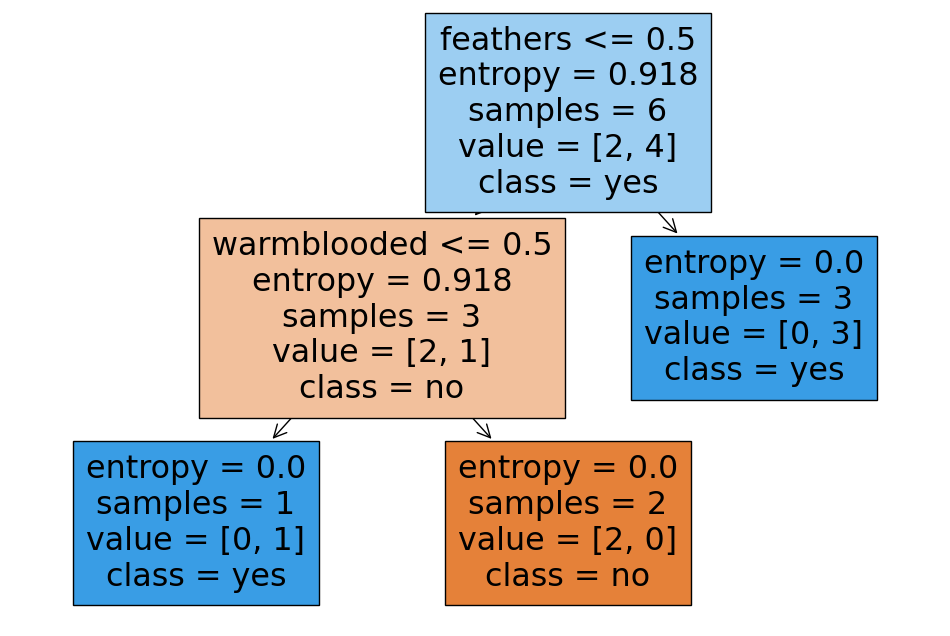

[0]


C:\Users\sammj\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Load the data from CSV
df = pd.read_csv("decision_tree1.csv", sep=",")

# Encode "yes" as 1 and "no" as 0
df = df.applymap(lambda x: 1 if x == 'yes' else 0)

# Prepare the feature matrix and target vector
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy")

# Train the classifier
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['no', 'yes'], filled=True)
plt.show()

new_data = [[1,0,0,1]]
ypred = clf.predict(new_data)
print(ypred)

# Back Propagation

In [65]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) #maximum of X array longitudinally
y = y/100
def sigmoid (x):
    return 1/(1 + np.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)
epoch=5
lr=0.1
inputlayer_neurons = 2 
hiddenlayer_neurons = 3 
output_neurons = 1 
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    #Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+bout
    output = sigmoid(outinp)
    #Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) *lr   
    wh += X.T.dot(d_hiddenlayer) *lr
    print ("-----------Epoch-", i+1, "Starts----------")
    print("Input: \n" + str(X)) 
    print("Actual Output: \n" + str(y))
    print("Predicted Output: \n" ,output)
    print ("-----------Epoch-", i+1, "Ends----------\n")
print("Input: \n" + str(X)) 
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

-----------Epoch- 1 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.8097524 ]
 [0.79799118]
 [0.80764754]]
-----------Epoch- 1 Ends----------

-----------Epoch- 2 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.81084905]
 [0.79903314]
 [0.80873553]]
-----------Epoch- 2 Ends----------

-----------Epoch- 3 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.81192277]
 [0.80005383]
 [0.80980087]]
-----------Epoch- 3 Ends----------

-----------Epoch- 4 Starts----------
Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.81297426]
 [0.8010539 ]
 [0.810

# Naive Bayes

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
df=pd.read_csv("iris1.csv")
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=y.astype('category')
y=y.cat.codes
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
g=GaussianNB()
g.fit(xtrain,ytrain)
ypred=g.predict(xtest)
print(accuracy_score(ytest,ypred))

1.0


# Bayesian Belief Network

In [42]:
import pandas as pd
import numpy as np
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
df=pd.read_csv("Medical Dataset.csv")
df=df.replace("?",np.nan)
model=BayesianNetwork([('age','heartdisease'),('sex','heartdisease'),
('exang','heartdisease'),('cp','heartdisease'),
('heartdisease','restecg'),('heartdisease','chol')])
model.fit(df,estimator=MaximumLikelihoodEstimator)
infer=VariableElimination(model)
q=infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q)

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1016 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2361 |
+-----------------+---------------------+
| heartdisease(3) |              0.2017 |
+-----------------+---------------------+
| heartdisease(4) |              0.4605 |
+-----------------+---------------------+


# E-M Algorithm

C:\Users\sammj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


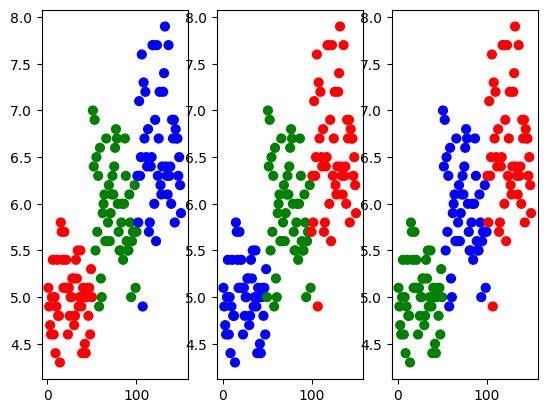

In [48]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
df=pd.read_csv('Iris.csv')
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=y.astype('category')
y=y.cat.codes
colormap=np.array(["red","green","blue"])
km=KMeans(n_clusters=3)
km.fit(x)
kmc=km.predict(x)
gm=GaussianMixture(n_components=3)
gm.fit(x)
gmc=gm.predict(x)
plt.subplot(1,3,1)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=colormap[y],s=40)
plt.subplot(1,3,2)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=colormap[kmc],s=40)
plt.subplot(1,3,3)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=colormap[gmc],s=40)
plt.show()

# K-Neighbor/Nearest

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
df=pd.read_csv('Iris.csv')
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=y.astype('category')
y=y.cat.codes
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
print(ypred)
acc = accuracy_score(ytest, ypred)
cf = confusion_matrix(ytest, ypred)
print(f"Accuracy: {acc} \n Confuson Matrix: \n {cf}")

[1 1 2 1 1 2 1 2 0 1 0 0 2 0 0 0 0 2 2 0 2 1 2 1 2 0 1 1 1 0 0 2 0 2 2 1 0
 0 1 2 1 1 1 0 1]
Accuracy: 1.0 
 Confuson Matrix: 
 [[15  0  0]
 [ 0 17  0]
 [ 0  0 13]]


# Regression

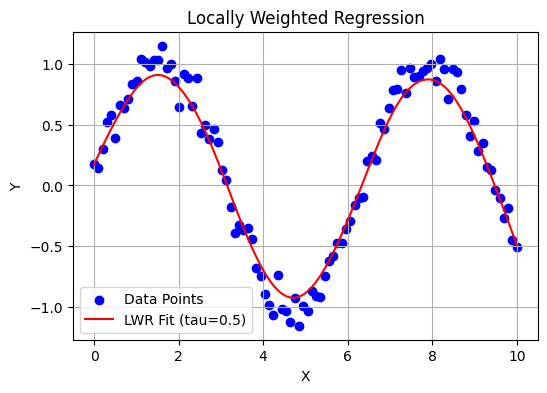

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(x_query, X, y, tau=0.1):
    X = np.vstack([X, np.ones_like(X)]).T
    weights = np.exp(-((X[:, 0] - x_query)**2) / (2 * tau**2))
    W = np.diag(weights)
    theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y)
    return np.array([x_query, 1]) @ theta

# Generate Synthetic Data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

# Predict using LWR
x_queries = np.linspace(0, 10, 100)
y_pred = [locally_weighted_regression(x, X, y, tau=0.5) for x in x_queries]

# Plot Results
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_queries, y_pred, color='red', label='LWR Fit (tau=0.5)')
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


# SVM

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
iris=pd.read_csv("Iris.csv")
x=iris.iloc[:,:-1]
y=iris.iloc[:,-1]
y=y.astype('category')
y=y.cat.codes
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
svmclf=make_pipeline(StandardScaler(),LinearSVC(C=15))
svmclf.fit(xtrain,ytrain)
ypred=(svmclf.predict(xtest))
acc=accuracy_score(ytest,ypred)
print(acc)

0.9555555555555556


C:\Users\DELL\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
